# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle files:
  <ul>
    <li>As requested in Q2.a and Q3.a</li>
  </ul>
</li>
<li> PY file:
  <ul>
   <li> As requested in Q3.a</li>
   </ul>
   </li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:

$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$ \frac{\partial softmax(x)_i}{\partial x_k} = \frac{\partial }{\partial x_k} (\frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}})= $$
$$ = (\frac{\partial }{\partial x_k} e^{x_i}) \cdot \frac{1}{\sum_{j=1}^{N} e^{x_j}} + e^{x_i}(\frac{\partial }{\partial x_k} \frac{1}{\sum_{j=1}^{N} e^{x_j}})= $$
$$ = \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} \cdot I_{i=k} - \frac{e^{x_i}e^{x_k}}{(\sum_{j=1}^{N} e^{x_j})^2}= $$
$$ = \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} \cdot I_{i=k} - \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \cdot \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}= $$
$$ = softmax(x)_k \cdot I_{i=k} - softmax(x)_i \cdot softmax(x)_k= $$
$$ = softmax(x)_k (I_{i=k} - softmax(x)_i) $$

## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes. 

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = ( \frac{\partial CE(y, \hat{y})}{\partial\theta _1} , \frac{\partial CE(y, \hat{y})}{\partial\theta _2} , ... , \frac{\partial CE(y, \hat{y})}{\partial\theta _N} ) $$
$$ \Downarrow $$
$$ \frac{\partial CE(y, \hat{y})}{\partial\theta _k} = \frac{\partial CE(y, \hat{y})}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial\theta _k} = $$
$$ \sum_{i=1}^{N} \frac{\partial CE(y, \hat{y})}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial\theta _k} = $$
$$ \sum_{i=1}^{N} (- \frac{y_i}{\hat{y}_i} \cdot \hat{y}_k (I_{i=k} - \hat{y}_i) ) = $$
$$ \sum_{i=1}^{N} (- y_i I_{i=k} + y_i \hat{y}_k ) = $$
$$ - y_k + (\sum_{i=1}^{N} y_i) \hat{y}_k = $$
$$ - y_k + 1 \cdot \hat{y}_k = \hat{y}_k - y_k $$
$$ \Downarrow $$
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = ( \hat{y}_1 - y_1 , \hat{y}_2 - y_2 , ... , \hat{y}_N - y_N ) = \hat{y} - y $$

# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [25]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [26]:
def d_sigmoid(x):
    return torch.exp(-x) / (1 + torch.exp(-x))**2


def d_tanh(x):
    return 1 - tanh(x)**2


def d_softmax(x):
    s = softmax(x)
    s = s.unsqueeze(-1)  # Adds a dimension
    i_equal_k_case = torch.diag_embed(s)
    return i_equal_k_case - torch.matmul(s, s.transpose(-1, -2))

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the forward and backward passes of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [27]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Lambda(lambda x: x.view(-1))])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    y_hat = torch.clip(y_hat, 1e-9, 1 - 1e-9)
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [28]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

In [29]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1) * 0.01
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr


    def forward(self, x):
        self.z1 = torch.matmul(x, self.W1) + self.b1
        self.s1 = self.activation_func(self.z1)

        self.z2 = torch.matmul(self.s1, self.W2) + self.b2
        self.s2 = softmax(self.z2)

        return self.s2


    def backward(self, x, y, y_hat):
        # Computing gradients of the loss w.r.t. W2, b2
        y = one_hot(y, self.output_size)  # Turn the label to a one-hot vector
        n = x.shape[0]
        dL_dz2 = (y_hat - y)  # As we proved in the first question, derivative of CE with softmax is y_hat - y.
        dz2_dW2 = self.s1  # Because z2 = s1 * W2 + b2
        dL_dW2 = torch.matmul(dz2_dW2.T, dL_dz2) / n  # Chain rule: dL_dW2 = dL_dz2 * dz2_dW2. Also normalizing by batch size.
        dL_db2 = dL_dz2.sum(axis=0) / n  # Chain rule: dL_db2 = dL_dz2 * dz2_db2, normalizing by batch size.

        # Computing gradients of the loss w.r.t. W1, b1
        dz2_ds1 = self.W2
        dL_ds1 = torch.matmul(dL_dz2, dz2_ds1.T)  # Chain rule: dL_ds1 = dL_dz2 * dz2_ds1
        ds1_dz1 = d_sigmoid(self.z1)
        dL_dz1 = dL_ds1 * ds1_dz1  # Chain rule
        dz1_dW1 = x
        dL_dW1 = torch.matmul(dz1_dW1.T, dL_dz1) / n
        dL_db1 = dL_dz1.sum(axis=0) / n

        # Updating weights
        self.W2 -= self.lr * dL_dW2
        self.b2 -= self.lr * dL_db2
        self.W1 -= self.lr * dL_dW1
        self.b1 -= self.lr * dL_db1

    def train(self, train_dataloader):
        total_loss, num_correct_predictions = 0, 0
        for x, y in train_dataloader:
            x = x.view(x.size(0), -1)
            y_hat = self.forward(x)
            loss = cross_entropy(y, y_hat)
            total_loss += loss.item()
            num_correct_predictions += torch.sum(torch.argmax(y_hat, dim=-1) == y).item()
            
            self.backward(x, y, y_hat)
        return total_loss, num_correct_predictions
    
    def eval(self, test_dataloader):
        total_loss, num_correct_predictions = 0, 0
        with torch.no_grad():
            for x, y in test_dataloader:
                x = x.view(x.size(0), -1)
                y_hat = self.forward(x)
                loss = cross_entropy(y, y_hat)
                total_loss += loss.item()
                num_correct_predictions += torch.sum(torch.argmax(y_hat, dim=-1) == y).item()
        return total_loss, num_correct_predictions

In [30]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [31]:
training_loss, test_loss, training_accuracy, test_accuracy = list(), list(), list(), list()
for epoch in range(EPOCHS):
    # First stage: Training
    total_loss, num_correct_predictions = model.train(train_dataloader)
    training_loss.append(total_loss / len(train_dataloader))
    training_accuracy.append(num_correct_predictions / len(train_dataset))

    # Second stage: Testing
    total_loss, num_correct_predictions = model.eval(test_dataloader)
    test_loss.append(total_loss / len(test_dataloader))
    test_accuracy.append(num_correct_predictions / len(test_dataset))

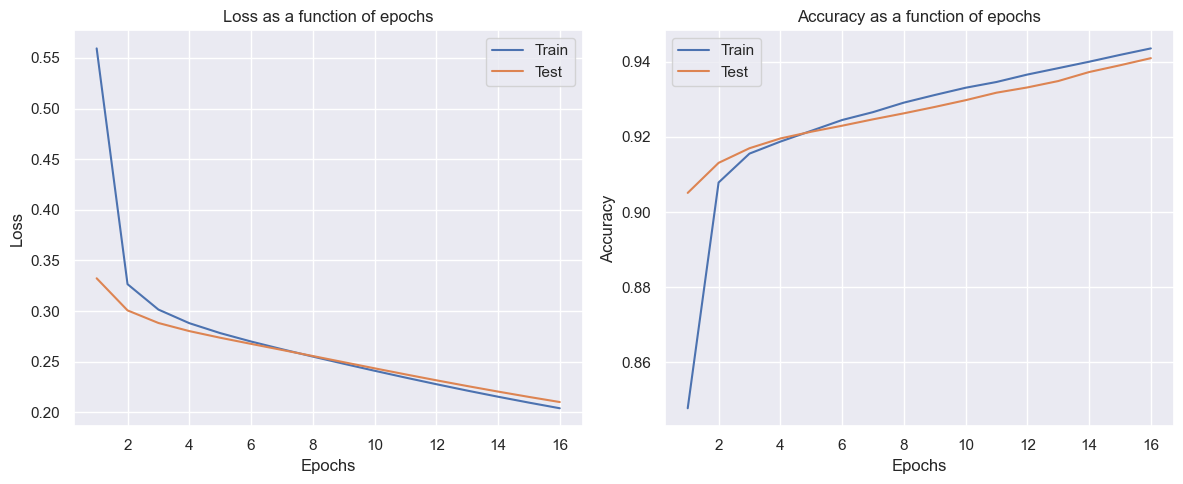

In [32]:
# Plot losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), training_loss, label='Train')
plt.plot(range(1, EPOCHS + 1), test_loss, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss as a function of epochs')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), training_accuracy, label='Train')
plt.plot(range(1, EPOCHS + 1), test_accuracy, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of epochs')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
students_ids = "319044434_314779166"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

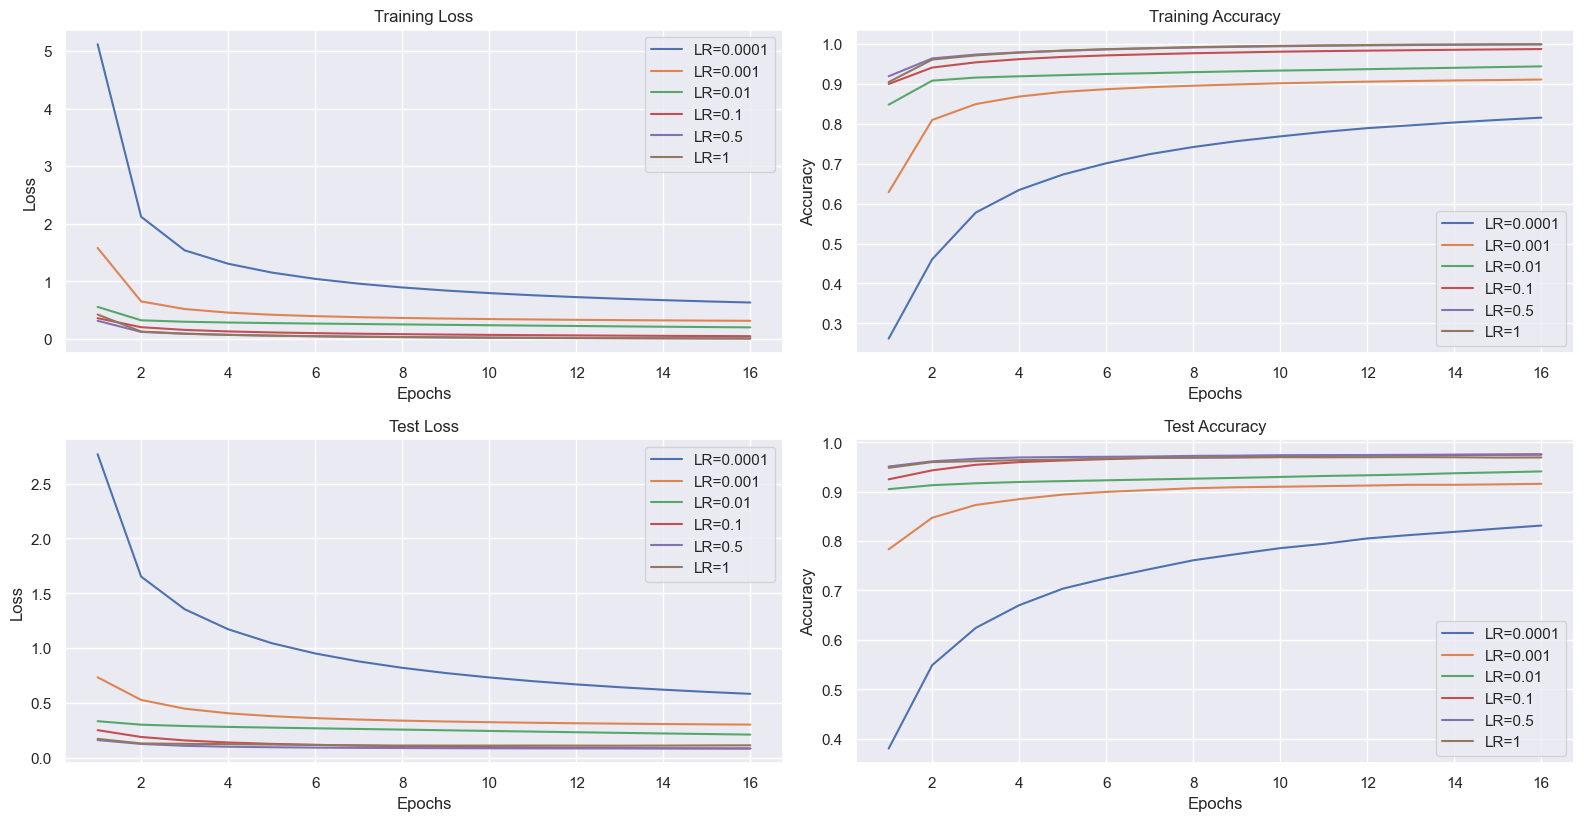

In [34]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
results = {}

for lr in learning_rates:
    set_seed(SEED)
    model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)

    # Train and evaluate
    training_loss, test_loss, training_accuracy, test_accuracy = list(), list(), list(), list()
    for epoch in range(EPOCHS):
        # First stage: Training
        total_loss, num_correct_predictions = model.train(train_dataloader)
        training_loss.append(total_loss / len(train_dataloader))
        training_accuracy.append(num_correct_predictions / len(train_dataset))

        # Second stage: Testing
        total_loss, num_correct_predictions = model.eval(test_dataloader)
        test_loss.append(total_loss / len(test_dataloader))
        test_accuracy.append(num_correct_predictions / len(test_dataset))

    # Store results
    results[lr] = {
        "train_loss": training_loss,
        "test_loss": test_loss,
        "train_acc": training_accuracy,
        "test_acc": test_accuracy
    }

# Plot results
plt.figure(figsize=(16, 12))

for idx, lr in enumerate(learning_rates):
    # Training loss
    plt.subplot(3, 2, 1)
    plt.plot(range(1, EPOCHS + 1), results[lr]["train_loss"], label=f"LR={lr}")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Training accuracy
    plt.subplot(3, 2, 2)
    plt.plot(range(1, EPOCHS + 1), results[lr]["train_acc"], label=f"LR={lr}")
    plt.title("Training Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Testing loss
    plt.subplot(3, 2, 3)
    plt.plot(range(1, EPOCHS + 1), results[lr]["test_loss"], label=f"LR={lr}")
    plt.title("Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Testing accuracy
    plt.subplot(3, 2, 4)
    plt.plot(range(1, EPOCHS + 1), results[lr]["test_acc"], label=f"LR={lr}")
    plt.title("Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()

The learning rates affect the convergence:
- A higher lr will descend faster and be able to escape local min. However, it may have hasteful "jumps" and might move back and forth without finding the optimum (divergence).
- A lower lr will descend slowly and steadily. However, it might get stuck in a local minima. Also, the number of epochs required for convergence is greater.
- Our go-to lr is somewhere in between, 0.01, because it has some stability yet it doesn't take too long to converge, in our opinion.

The graphs above support these claims.
- We can see that a low lr, 0.0001, takes a lot of epochs to achive high accuracy and a small loss.
- As the lr increases, we're achieving better accuracy and loss in less epochs.
- However, looking at the 2 highest lrs, 0.5 and 1, we can see a clear over-fitting: at train time, lr=1 has the same accuracy and loss levels as lr=0.5 and lr=0.01, but on test time it has inferior results to them both.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> As you might know, there are many dogs on campus. Sometimes, understanding the emotions of a dog can be challenging, and people might mistakenly try to pet it when it is sad or angry. As a data scientist, you have been asked to assist Technion's students. Your task is to create a "dog emotion classifier.
<br>
Your code should meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
To satisfy your boss, your model must achieve at least 70% accuracy on the test set. Your boss also emphasized that the model will be deployed on smartphones, so it should have a small number of parameters. 25% of your grade for this task will be based on the number of parameters your model uses — fewer parameters will yield a higher grade.</p>

#### Stages
<ol style="font-size: 17px"> 
<li>Perform a short EDA (Exploratory Data Analysis).</li>
 <li>Train the model and plot its accuracy and loss (for both the training and validation sets) as a function of the epochs.</li>
  <li>Report the test set accuracy.</li>
   <li>Discuss the progress you made and describe your final model.</li>
    </ol>
<br>
 Your data is in <code>hw1_data/dog_emotion</code>.
<br>
You can define a custom dataset (as in tutorial 3) or use <code>torchvision.datasets.ImageFolder</code>.

 #### Submission
 <p style="font-size: 17px"> In addition to the code in the notebook, you should submit:
<ul style="font-size: 17px">
<li> a <code>.py</code> file containing your model class.</li>
<li> a <code>.pkl</code> file containing the weight of your model</li>
</ul>

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the <code>hw1_data/birds</code> folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the <code>hw1_data/dogs</code> folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.